In [1]:
import random
import projetannuel
from lib_gridfs import load_posters_with_size, stock_metrics

In [2]:
imgs, genres = load_posters_with_size((10, 10), genres=['Horreur', 'Animation', 'Histoire'])
imgs_as_lists = [img.tolist() for img in imgs]

📦 Found 2991 images of size 10x10


📥 Loading resized images: 100%|██████████| 2991/2991 [00:08<00:00, 340.29it/s]


In [3]:
data = list(zip(imgs_as_lists, genres))
random.shuffle(data)
imgs_shuffled = [movie[0] for movie in data]
genres_shuffled = [movie[1] for movie in data]

In [4]:
lim = int(len(data) * 0.8)
imgs_as_lists_train = imgs_shuffled[:lim]
genres_train = genres_shuffled[:lim]
imgs_as_lists_test = imgs_shuffled[lim:]
genres_test = genres_shuffled[lim:]

In [5]:
import projetannuel

y = projetannuel.string_labels(genres_train)

model = projetannuel.LinearModel(
    imgs_as_lists_train,
    y
)

In [6]:
model.train_classification(epochs=10_000, learning_rate=0.1, x_test=imgs_as_lists_test, y_test=projetannuel.string_labels(genres_test))

In [7]:
# model.save("../saved_model/linear_images_20x30_2000im_50000ep_0-05lr.json")

In [8]:
y_pred = []
for img in imgs_as_lists_test:
    y_pred.append(model.predict(img))

In [9]:
print(y_pred)

['Horreur', 'Horreur', 'Histoire', 'Horreur', 'Animation', 'Histoire', 'Histoire', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Histoire', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Histoire', 'Animation', 'Histoire', 'Horreur', 'Histoire', 'Histoire', 'Animation', 'Animation', 'Animation', 'Histoire', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Histoire', 'Horreur', 'Horreur', 'Animation', 'Histoire', 'Histoire', 'Horreur', 'Horreur', 'Histoire', 'Horreur', 'Animation', 'Horreur', 'Histoire', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Histoire', 'Histoire', 'Horreur', 'Horreur', 'Histoire', 'Histoire', 'Animation', 'Horreur', 'Histoire', 'Horreur', 'Histoir

In [10]:
projetannuel.accuracy_score(genres_test, y_pred)

0.5242070116861436

In [11]:
y_pred.count('Horreur')

235

In [12]:
y_pred.count('Animation')

212

In [13]:
y_pred.count('Histoire')

152

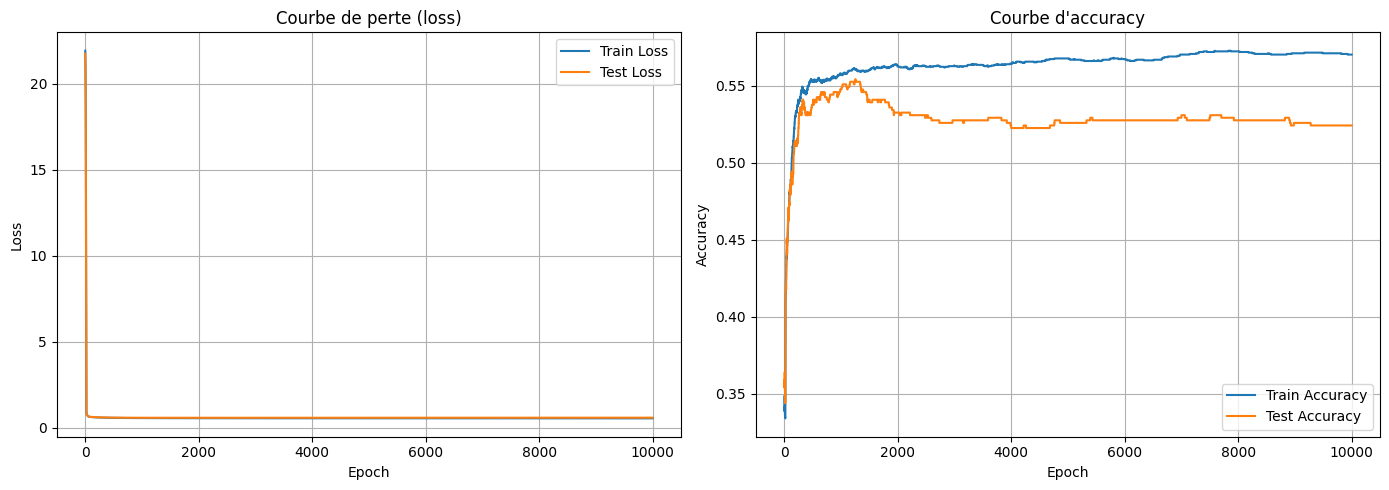

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de perte (Loss)
axs[0].plot(model.train_loss, label='Train Loss')
axs[0].plot(model.test_loss, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Courbe de perte (loss)')
axs[0].grid(True)
axs[0].legend()

# Courbe d'accuracy
axs[1].plot(model.train_accuracy, label='Train Accuracy')
axs[1].plot(model.test_accuracy, label='Test Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Courbe d\'accuracy')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

In [15]:
grfsdc

NameError: name 'grfsdc' is not defined

## MLP

In [ ]:
genres_binary_train = [[0] if x=="Animation" else [1] for x in genres_train]

In [ ]:
import projetannuel as pa
model = pa.MLP([1800, 4, 1])
model.train(imgs_as_lists_train,genres_binary_train,1_000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists_test]

PanicException: index out of bounds: the len is 300 but the index is 300

In [ ]:
y_pred_train = [model.predict(x, True)[0] for x in imgs_as_lists_train]

In [ ]:
model.save("../saved_model/mlp_images_20x30_2000im_6-4-1npl_1000ep_0-01lr.json")

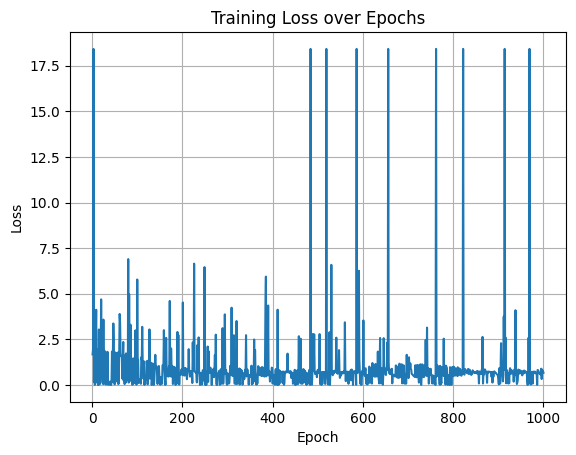

In [ ]:
import matplotlib.pyplot as plt

# noraml car affiche pas par epochs

loss = model.loss  
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [ ]:
genres_binary_test = [0 if x=="Animation" else 1 for x in genres_test]

In [ ]:
genres_binary_train = [0 if x=="Animation" else 1 for x in genres_train]

In [ ]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

101

In [ ]:
y_pred_train = [0 if x<0.5 else 1 for x in y_pred_train]

In [ ]:
pa.accuracy_score(genres_binary_train, y_pred_train)

0.639549436795995

# RBF

In [ ]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000, 100000],
}

In [ ]:
# import itertools

# best_score = 0.0
# best_params = None
# y = projetannuel.string_labels(genres_train)

# for c, gamma in itertools.product(
#     param_grid["C"],
#     param_grid["gamma"],
# ):
#     model = projetannuel.RBF(
#         imgs_as_lists_train,
#         y,
#         gamma = gamma,
#         k = c
#     )
#     model.train_classification(epochs=10_000, learning_rate=0.01, algo="rosenblatt")
#     Y_pred = [model.predict(x) for x in imgs_as_lists_test]
#     acc = projetannuel.accuracy_score(genres_test, Y_pred)
    
#     print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, c)

Tested: Gamma=0.0001, C=1, acc=0.3367
Tested: Gamma=0.001, C=1, acc=0.3367
Tested: Gamma=0.01, C=1, acc=0.3283
Tested: Gamma=0.1, C=1, acc=0.3367
Tested: Gamma=1, C=1, acc=0.3350
Tested: Gamma=10, C=1, acc=0.3367
Tested: Gamma=100, C=1, acc=0.3283
Tested: Gamma=0.0001, C=10, acc=0.3283
Tested: Gamma=0.001, C=10, acc=0.3283
Tested: Gamma=0.01, C=10, acc=0.3350
Tested: Gamma=0.1, C=10, acc=0.3283
Tested: Gamma=1, C=10, acc=0.3283
Tested: Gamma=10, C=10, acc=0.3350
Tested: Gamma=100, C=10, acc=0.3350
Tested: Gamma=0.0001, C=100, acc=0.3350
Tested: Gamma=0.001, C=100, acc=0.3367
Tested: Gamma=0.01, C=100, acc=0.3367
Tested: Gamma=0.1, C=100, acc=0.3283


In [ ]:
y = projetannuel.string_labels(genres_train)

model = projetannuel.RBF(
    imgs_as_lists_train,
    y,
    gamma = 0.01,
    k = 120
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")
# print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

In [ ]:
Y_pred = [model.predict(x) for x in imgs_as_lists_test]
projetannuel.accuracy_score(genres_test, Y_pred)

map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"Science-Fiction": 2, "Horreur": 1, "Animation": 0})
val : 0.33055664612739044
val : 0.3390387665715714
val : 0.3287624452956885
map : Some({"

0.31

In [ ]:
import numpy as np

print(np.mean(model.weights[0]))
print(np.mean(model.weights[1]))
print(np.mean(model.weights[2]))

0.480840441238805
0.4742766407854321
0.5090166473254114


In [ ]:
print(model.weights[0][0])
print(model.weights[1][0])
print(model.weights[2][0])

0.3304091565605354
0.22874721709167722
0.4246234683561857


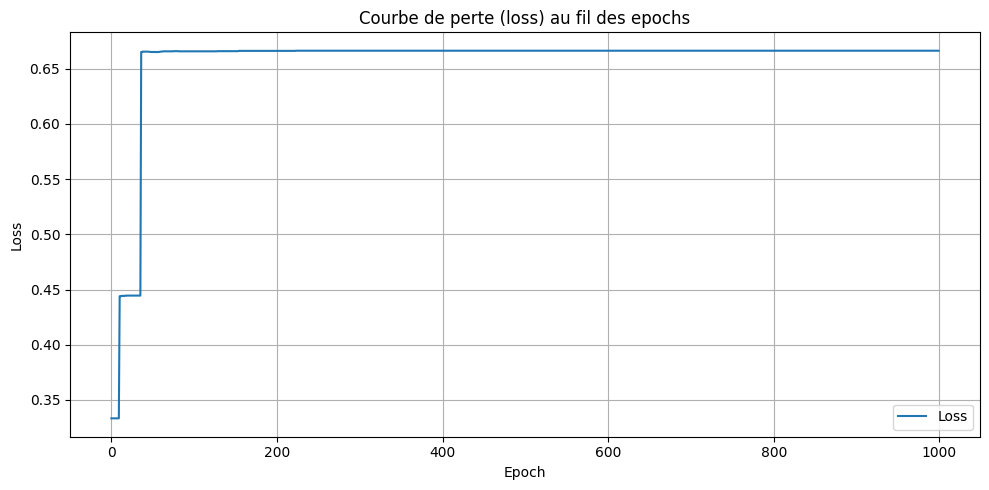

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.train_accuracy, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
from projetannuel import SVM, SVMKernelType, SoftMargin

In [ ]:
genres_binary_train = [-1 if x=="Animation" else 1 for x in genres_train]
genres_binary_test = [-1 if x=="Animation" else 1 for x in genres_test]

In [ ]:
model = SVM(SVMKernelType.rbf(0.1),SoftMargin.Soft(5))
model.train(imgs_as_lists_train, genres_binary_train)

OSQP status   = Solved(Solution { x: [0.9739942484391106, 0.9876306337459678, 0.9742834176793036, 0.7828046186908795, 0.9742851708770022, 0.9740110978128517, 1.0256942180353497, 1.0219555847333057, 0.9867185987036451, 0.9742841941775287, 0.9742954064257059, 0.9742803335598951, 0.9740228737060705, 0.973289577486885, 1.0209686291468412, 1.0018489994506103, 0.9742869480641282, 0.9742781548895142, 1.0109403489003495, 0.9742321242272973, 1.025704541974149, 0.9742946677698924, 0.9740028518108961, 1.024573162766581, 1.017482283007498, 0.6915743610343181, 0.7271518329378562, 1.0218140694867106, 0.9742961720316962, 0.9742655156498915, 0.5829151929302693, 0.9742657525398957, 0.9743208854628842, 0.9322624204364691, 0.9742422336156501, 1.0257037060813485, 0.980657274962672, 0.9741212360821366, 1.0258367364625924, -3.716338385629865e-22, 1.0235042601357958, 1.0238492098100587, 0.9742628508881261, 1.0257055663732866, 0.9738284519736465, 0.9735678016761812, 1.0204683987139198, 0.7011123368619145, 1.0

In [ ]:
Y_pred = [model.predict([x])[0] for x in imgs_as_lists_test]
print(f"Accuracy Score : {projetannuel.accuracy_score(genres_binary_test, Y_pred)}")

Accuracy Score : 0.625


In [ ]:
Y_pred.count(-1)

342

In [ ]:
genres_binary_test.count(-1)

194